<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Neural Networks with One Hidden Layer</h1>


<h2>Objective</h2><ul><li> How to classify handwritten digits using Neural Network.</li></ul> 


<h2>Preparation</h2>


In [1]:
import numpy as np
import matplotlib.pylab as plt

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F

torch.manual_seed(1)

In [2]:
# Define function to plot accuracy and loss

def plot_accuracy_loss(training_results):
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('Loss')
    plt.title('Training Loss Iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.show()

In [3]:
# Define function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ('Parameters for Layer:', count // 2 + 1)
        if ele.find("bias") != -1:
            print('Bias Size:', model.state_dict()[ele].size())
        else:
            print('Size of Weights:', model.state_dict()[ele].size())

In [4]:
# Define function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28),
               cmap = 'gray')
    plt.show()

<h2 id="Model">Neural Network Module and Training Function</h2> 


In [5]:
# Define Neural Network class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [6]:
# Define training function for model training
# Function returns Python dictionary to store training loss and accuracy on the validation data

def train(model, criterion, train_loader,
          validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            # Loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            # validation
            z = model(x.view(-1, 28 * 28))
            _, yhat = torch.max(z, 1)
            correct += (yhat == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [7]:
# Create training dataset

train_dataset = dsets.MNIST(root = './data', train = True,
                            download = True, transform = transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
# Create validating dataset

validation_dataset = dsets.MNIST(root = './data', download = True,
                                 transform = transforms.ToTensor())

In [9]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

In [10]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = 2000, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset,
                                                batch_size = 5000, shuffle = False)

<h2 id="Train">Define the Neural Network, Optimizer, and Train the Model</h2> 


In [11]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [12]:
# Print the parameters for model

print_model_parameters(model)

Parameters for Layer: 1
Size of Weights: torch.Size([100, 784])
Bias Size: torch.Size([100])
Parameters for Layer: 2
Size of Weights: torch.Size([10, 100])
Bias Size: torch.Size([10])


In [13]:
# Set learning rate and optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [14]:
# Train the model by using 100 epochs (it takes time!!)

training_results = train(model, criterion,
                         train_loader, validation_loader,
                         optimizer, epochs = 30)

<h2 id="Result">Analyze Results</h2> 


Plot the training total loss or cost for every iteration and plot the training accuracy for every epoch:  


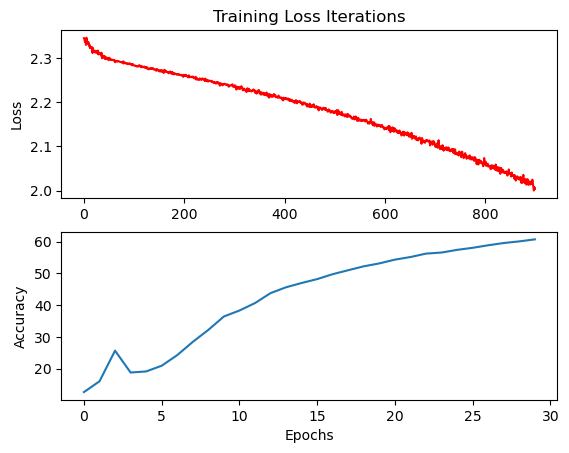

In [15]:
plot_accuracy_loss(training_results)

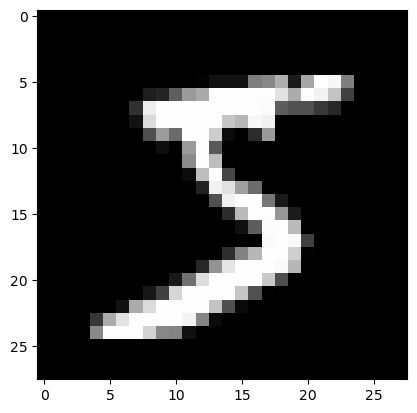

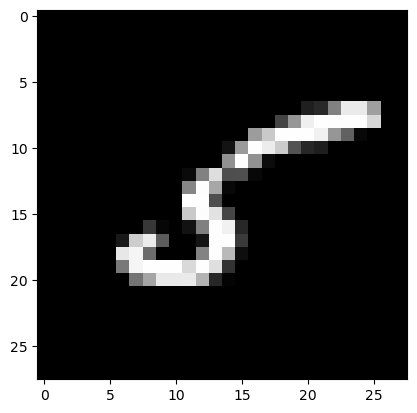

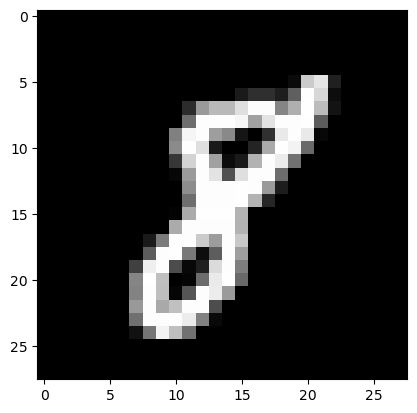

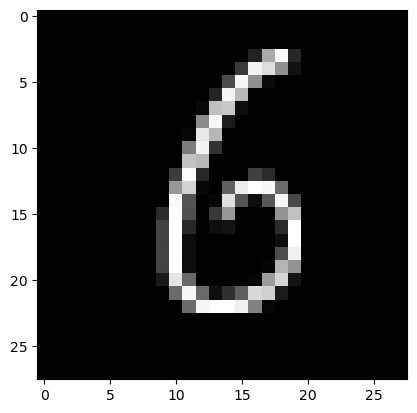

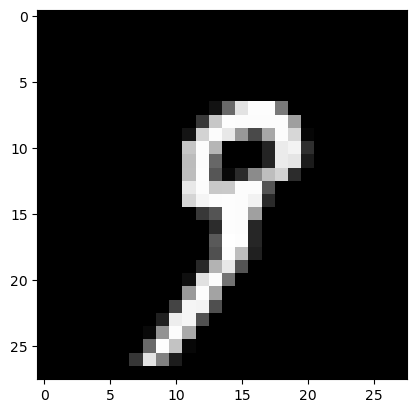

In [16]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

<h3>Practice</h3> 


Use <code>nn.Sequential</code> to build exactly the same model as you just built. Use the function <train>train</train> to train the model and use the function <code>plot_accuracy_loss</code> to see the metrics. Also, try different epoch numbers. 


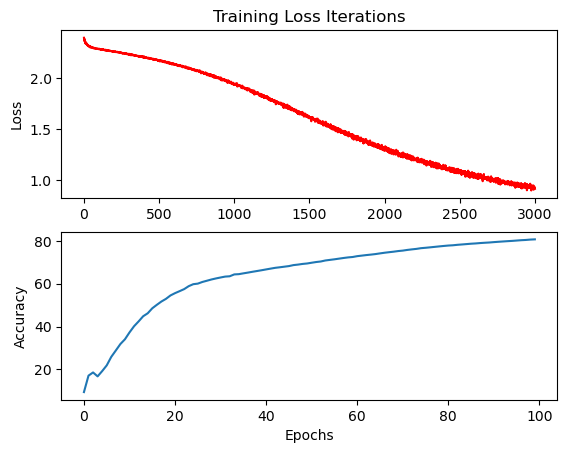

In [18]:
model2 = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                       nn.Sigmoid(),
                       nn.Linear(hidden_dim, output_dim))
optimizer2 = torch.optim.SGD(model2.parameters(), lr = learning_rate)
training2_results = train(model2, criterion,
                         train_loader, validation_loader,
                         optimizer2, epochs = 100)

plot_accuracy_loss(training2_results)

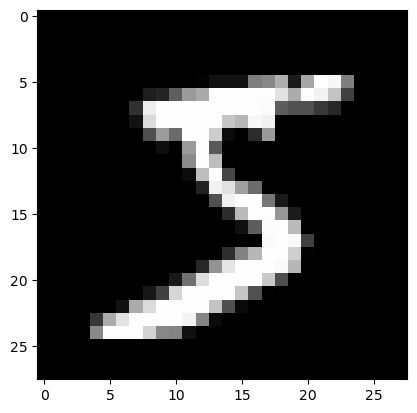

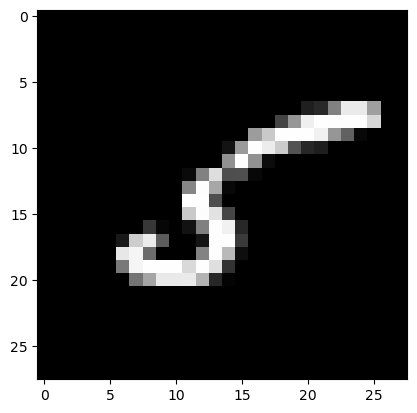

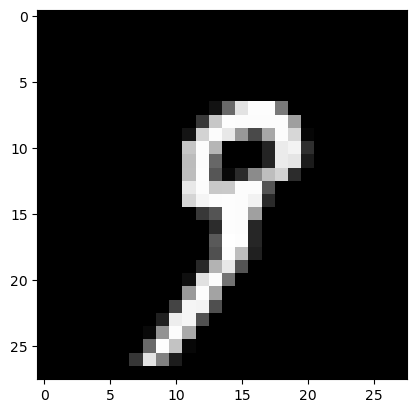

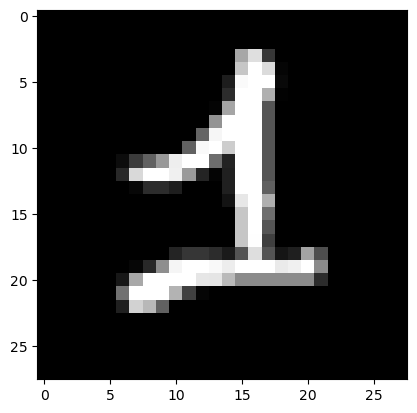

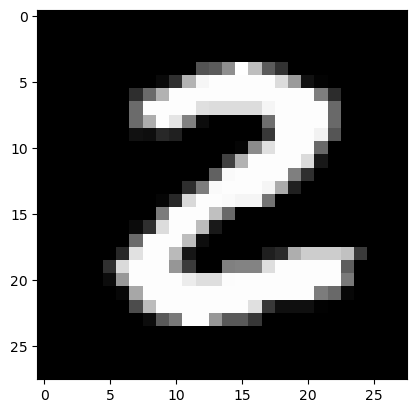

In [19]:
count = 0
for x, y in validation_dataset:
    z = model2(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break